# fastai v2 | How fastai v2 deals with batch sizes for the training and validation datasets

The objective of this notebook is to explain how [fastai v2](https://github.com/fastai/fastai2) deals with batch sizes for the training and validation datasets.

- Author: Pierre Guillou
- Date: May 2020
- Dataset source: Dogs vs. Cats (https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview)

## Results

**Training dataset**
- When the batch size (bs) is greater than the number of images (num_images) of the training dataset, fastai v2 cannot create a batch. Then, the training of the learner will therefore not give any useful result.
- When the batch size (bs) is equal to the number of images (num_images) of the training dataset, fastai v2 creates a training batch and the training of the learner can be done (1 batch by epoch).
- When the batch size (bs) is less than the number of images (num_images) in the training dataset, fastai v2 will create a number of batches equal to the quotient of the num_images / bs division. fastai v2 will therefore train the learner with a lower number of images per epoch than the total number of images in the training dataset.

**Validation dataset** 

In all cases, fastai v2 uses the total number of images in the validation dataset, possibly using a last batch of smaller size when the batch size (bs) is less than the number of images (num_images) of the validation dataset but does not divide this number of images (rest of the division different from 0).


## Initialization

In [1]:
from utils import *
from fastai2.vision.widgets import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Get data

In [5]:
# !kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100%|███████████████████████████████████████▉| 813M/814M [02:10<00:00, 6.83MB/s]
100%|████████████████████████████████████████| 814M/814M [02:12<00:00, 6.43MB/s]


In [13]:
#!mv dogs-vs-cats-redux-kernels-edition.zip data/
#%cd data
#!unzip dogs-vs-cats-redux-kernels-edition.zip
#!unzip train.zip
#!unzip test.zip 
#!mkdir dogs-vs-cats
#!mv train/ train.zip test/ test.zip sample_submission.csv dogs-vs-cats/

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               
total 1667592
-rw-rw-rw- 1 pierre pierre 853083403 May  6 12:54 dogs-vs-cats-redux-kernels-edition.zip
drwxrwxrwx 3 pierre pierre      4096 May  6 12:54 flowers
-rw-rw-r-- 1 pierre pierre    113903 Dec 11 04:18 sample_submission.csv
-rw-rw-r-- 1 pierre pierre 284478493 Dec 11 04:18 test.zip
-rw-rw-r-- 1 pierre pierre 569918665 Dec 11 04:18 train.zip


In [4]:
%pwd

'/mnt/home/pierre/course-v4/nbs'

In [4]:
path_data = Path('data/dogs-vs-cats/')

In [5]:
fns = get_image_files(path_data/'train')
fns, len(fns)

((#25000) [Path('data/dogs-vs-cats/train/cat.1000.jpg'),Path('data/dogs-vs-cats/train/cat.10046.jpg'),Path('data/dogs-vs-cats/train/cat.10140.jpg'),Path('data/dogs-vs-cats/train/cat.10155.jpg'),Path('data/dogs-vs-cats/train/cat.10158.jpg'),Path('data/dogs-vs-cats/train/cat.10635.jpg'),Path('data/dogs-vs-cats/train/cat.10705.jpg'),Path('data/dogs-vs-cats/train/cat.10847.jpg'),Path('data/dogs-vs-cats/train/cat.10880.jpg'),Path('data/dogs-vs-cats/train/cat.10983.jpg')...],
 25000)

## Get sample

In [6]:
path_sample = Path(path_data/'sample')
path_sample.mkdir(parents=True, exist_ok=True)

In [10]:
import random

path_trn = path_data/'train'
pathlist = path_trn.glob('*.jpg')
nof_samples = 100

rc = []
for k, path in enumerate(pathlist):
    if k < nof_samples:
        rc.append(str(path)) # because path is object not string
    else:
        i = random.randint(0, k)
        if i < nof_samples:
            rc[i] = str(path)

print(len(rc))
print(rc)

100
['data/dogs-vs-cats/train/cat.3246.jpg', 'data/dogs-vs-cats/train/dog.8258.jpg', 'data/dogs-vs-cats/train/cat.8388.jpg', 'data/dogs-vs-cats/train/cat.10422.jpg', 'data/dogs-vs-cats/train/dog.4978.jpg', 'data/dogs-vs-cats/train/dog.4108.jpg', 'data/dogs-vs-cats/train/dog.7812.jpg', 'data/dogs-vs-cats/train/cat.107.jpg', 'data/dogs-vs-cats/train/cat.11535.jpg', 'data/dogs-vs-cats/train/dog.10979.jpg', 'data/dogs-vs-cats/train/dog.189.jpg', 'data/dogs-vs-cats/train/cat.7486.jpg', 'data/dogs-vs-cats/train/cat.9044.jpg', 'data/dogs-vs-cats/train/dog.9440.jpg', 'data/dogs-vs-cats/train/cat.2631.jpg', 'data/dogs-vs-cats/train/dog.12080.jpg', 'data/dogs-vs-cats/train/cat.1064.jpg', 'data/dogs-vs-cats/train/cat.9985.jpg', 'data/dogs-vs-cats/train/dog.3164.jpg', 'data/dogs-vs-cats/train/cat.3770.jpg', 'data/dogs-vs-cats/train/dog.2938.jpg', 'data/dogs-vs-cats/train/dog.7906.jpg', 'data/dogs-vs-cats/train/dog.2404.jpg', 'data/dogs-vs-cats/train/cat.12423.jpg', 'data/dogs-vs-cats/train/dog.24.

In [21]:
import shutil

for r in rc:
    my_file = Path(r)
    to_file = path_sample/my_file.name
    shutil.copy(str(my_file), str(to_file))

In [8]:
fns = get_image_files(path_data/'sample')
fns, len(fns)

((#100) [Path('data/dogs-vs-cats/sample/cat.3246.jpg'),Path('data/dogs-vs-cats/sample/dog.8258.jpg'),Path('data/dogs-vs-cats/sample/cat.8388.jpg'),Path('data/dogs-vs-cats/sample/cat.10422.jpg'),Path('data/dogs-vs-cats/sample/dog.4978.jpg'),Path('data/dogs-vs-cats/sample/dog.4108.jpg'),Path('data/dogs-vs-cats/sample/dog.7812.jpg'),Path('data/dogs-vs-cats/sample/cat.107.jpg'),Path('data/dogs-vs-cats/sample/cat.11535.jpg'),Path('data/dogs-vs-cats/sample/dog.10979.jpg')...],
 100)

data/dogs-vs-cats/sample/cat.3246.jpg


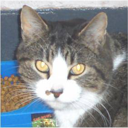

In [9]:
dest = fns[0]
im = Image.open(dest)
print(dest)
im.to_thumb(128,128)

In [33]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
# failed.map(Path.unlink);

## From data to DataLoaders

In [10]:
path_data.ls()

(#3) [Path('data/dogs-vs-cats/test'),Path('data/dogs-vs-cats/train'),Path('data/dogs-vs-cats/sample')]

In [11]:
fname = fns[0]
fname.name, re.findall(r'(.+)\.\d+.jpg$', fname.name)

('cat.3246.jpg', ['cat'])

In [12]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)\.\d+.jpg$'), 'name'),
    item_tfms=RandomResizedCrop(460, min_scale=0.5),
    batch_tfms= aug_transforms(size=224, min_scale=0.75))

In [13]:
# train 80 images
# valid 20 images
dls_90 = dblock.dataloaders(path_data/'sample', bs=90)
dls_80 = dblock.dataloaders(path_data/'sample', bs=80)
dls_70 = dblock.dataloaders(path_data/'sample', bs=70)
dls_40 = dblock.dataloaders(path_data/'sample', bs=40)
dls_10 = dblock.dataloaders(path_data/'sample', bs=10)
dls_7 = dblock.dataloaders(path_data/'sample', bs=7)

## Training

### bs = 90

In [17]:
# number of images in training and validation datasets
len(dls_90.train_ds), len(dls_90.valid_ds)

(80, 20)

In [16]:
# number of training and validation batches
len(dls_90.train), len(dls_90.valid)

(0, 1)

In [62]:
# number of images in all training batches
print('***** number of images in all training batches *****')
res = 0
if len(dls_90.train) != 0:
    for b in dls_90.train:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

# number of images in all validation batches
print('***** number of images in all validation batches *****')
res = 0
if len(dls_90.valid) != 0:
    for b in dls_90.valid:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

***** number of images in all training batches *****
0
***** number of images in all validation batches *****
20


In [55]:
learn = cnn_learner(dls_90, resnet18, metrics=error_rate)
learn.fit(n_epoch=2)

**Batch size of 90**
- As the train set has only 80 images, the method show_batch() can not display training images because there is no training batch (len(dls_90.train) = 0). 
- For the validation batch, fastai v2 creates one validation batch of 20 images. 
- Conclusion: **it is not possible to use a batch size larger than the number of training images.**

### bs = 80

In [18]:
# number of images in training and validation datasets
len(dls_80.train_ds), len(dls_80.valid_ds)

(80, 20)

In [19]:
# number of training and validation batches
len(dls_80.train), len(dls_80.valid)

(1, 1)

In [61]:
# number of images in all training batches
print('***** number of images in all training batches *****')
res = 0
if len(dls_80.train) != 0:
    for b in dls_80.train:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

# number of images in all validation batches
print('***** number of images in all validation batches *****')
res = 0
if len(dls_80.valid) != 0:
    for b in dls_80.valid:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

***** number of images in all training batches *****
80
***** number of images in all validation batches *****
20


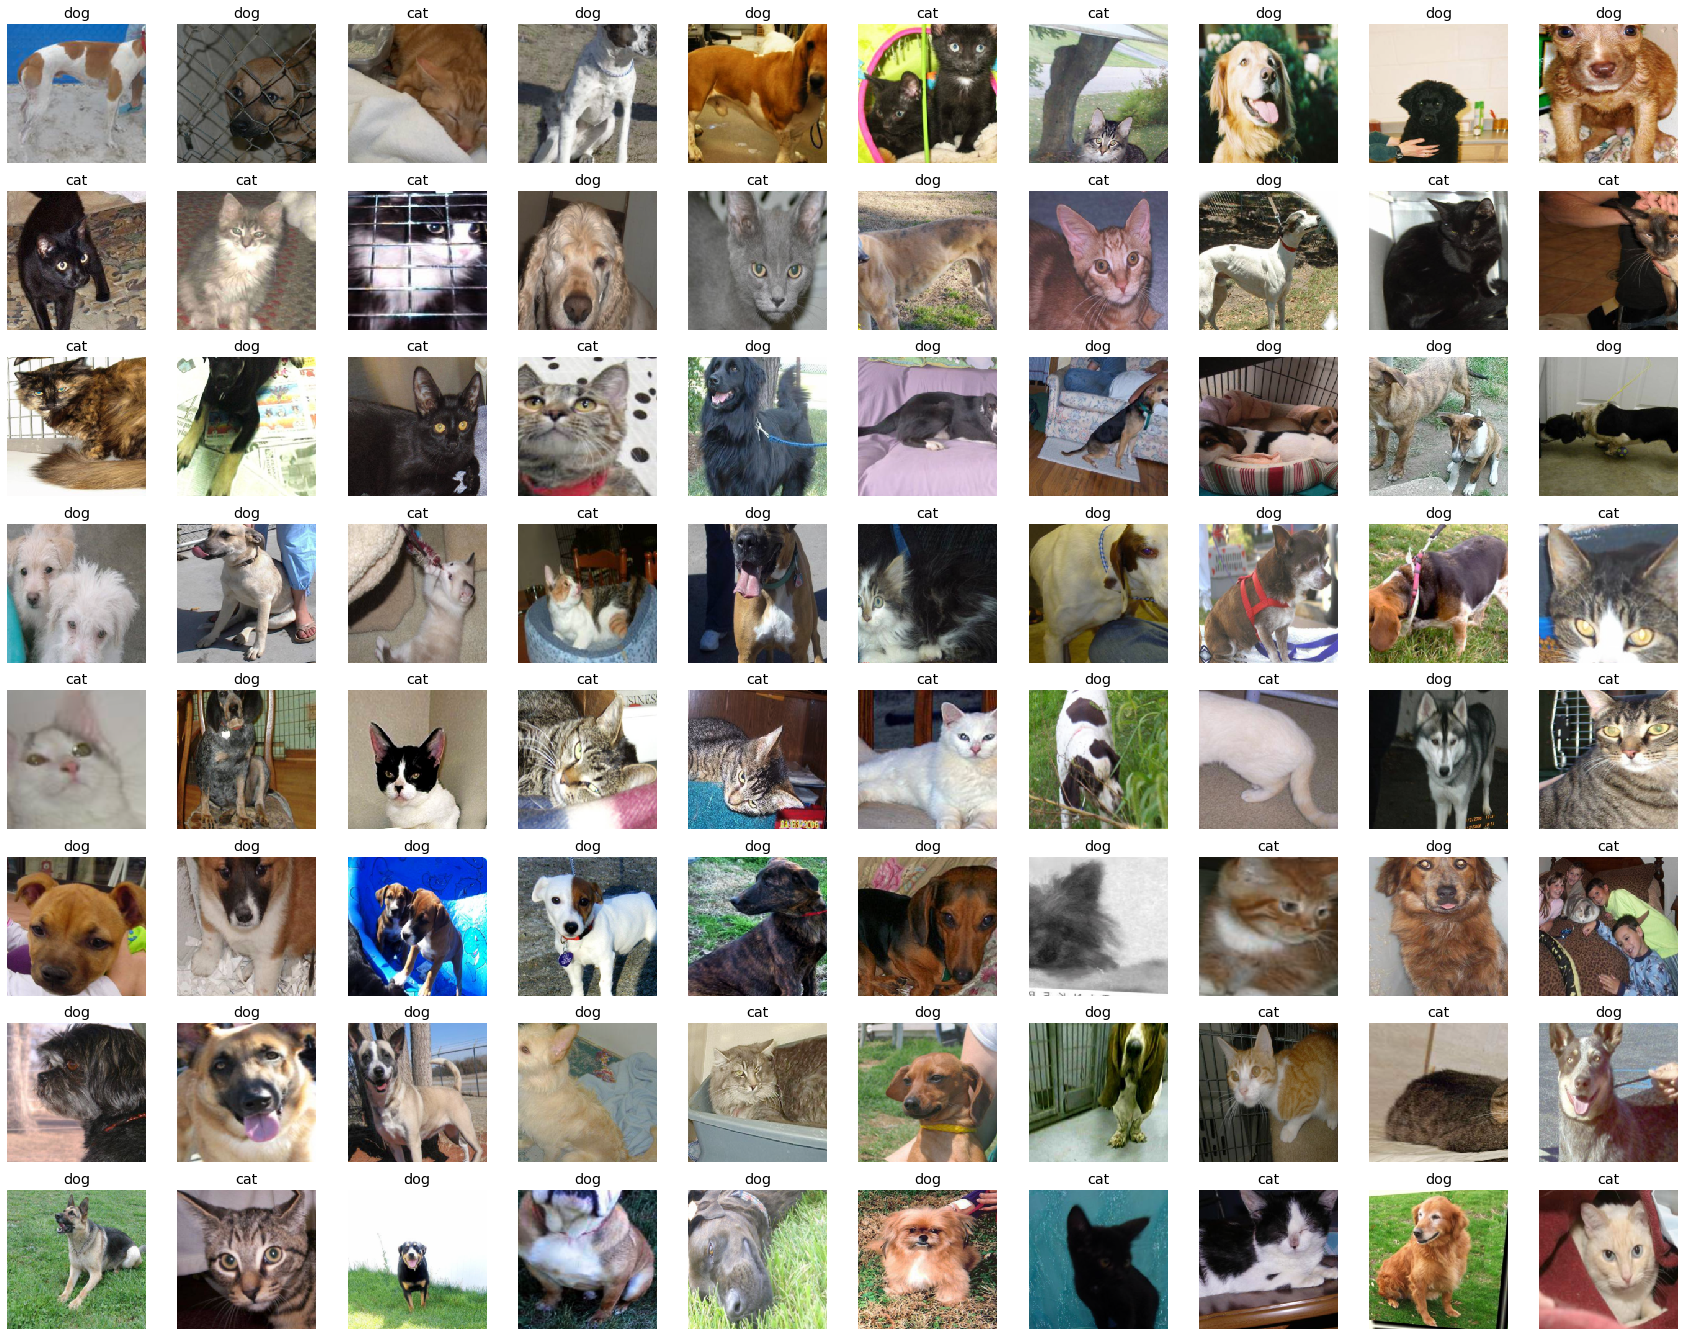

In [31]:
dls_80.train.show_batch(max_n=80, nrows=8)

In [56]:
learn = cnn_learner(dls_80, resnet18, metrics=error_rate)
learn.fit(n_epoch=2)

**Batch size of 80**
- As the train set has only 80 images, there is so one batch of 80 images.
- For the validation batch, fastai v2 creates one validation batch of 20 images.
- Conclusion: **it is possible to use a batch size identical to the number of training images.**

### bs = 70

In [20]:
# number of images in training and validation datasets
len(dls_70.train_ds), len(dls_70.valid_ds)

(80, 20)

In [21]:
# number of training and validation batches
len(dls_70.train), len(dls_70.valid)

(1, 1)

In [60]:
# number of images in all training batches
print('***** number of images in all training batches *****')
res = 0
if len(dls_70.train) != 0:
    for b in dls_70.train:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

# number of images in all validation batches
print('***** number of images in all validation batches *****')
res = 0
if len(dls_70.valid) != 0:
    for b in dls_70.valid:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

***** number of images in all training batches *****
70
***** number of images in all validation batches *****
20


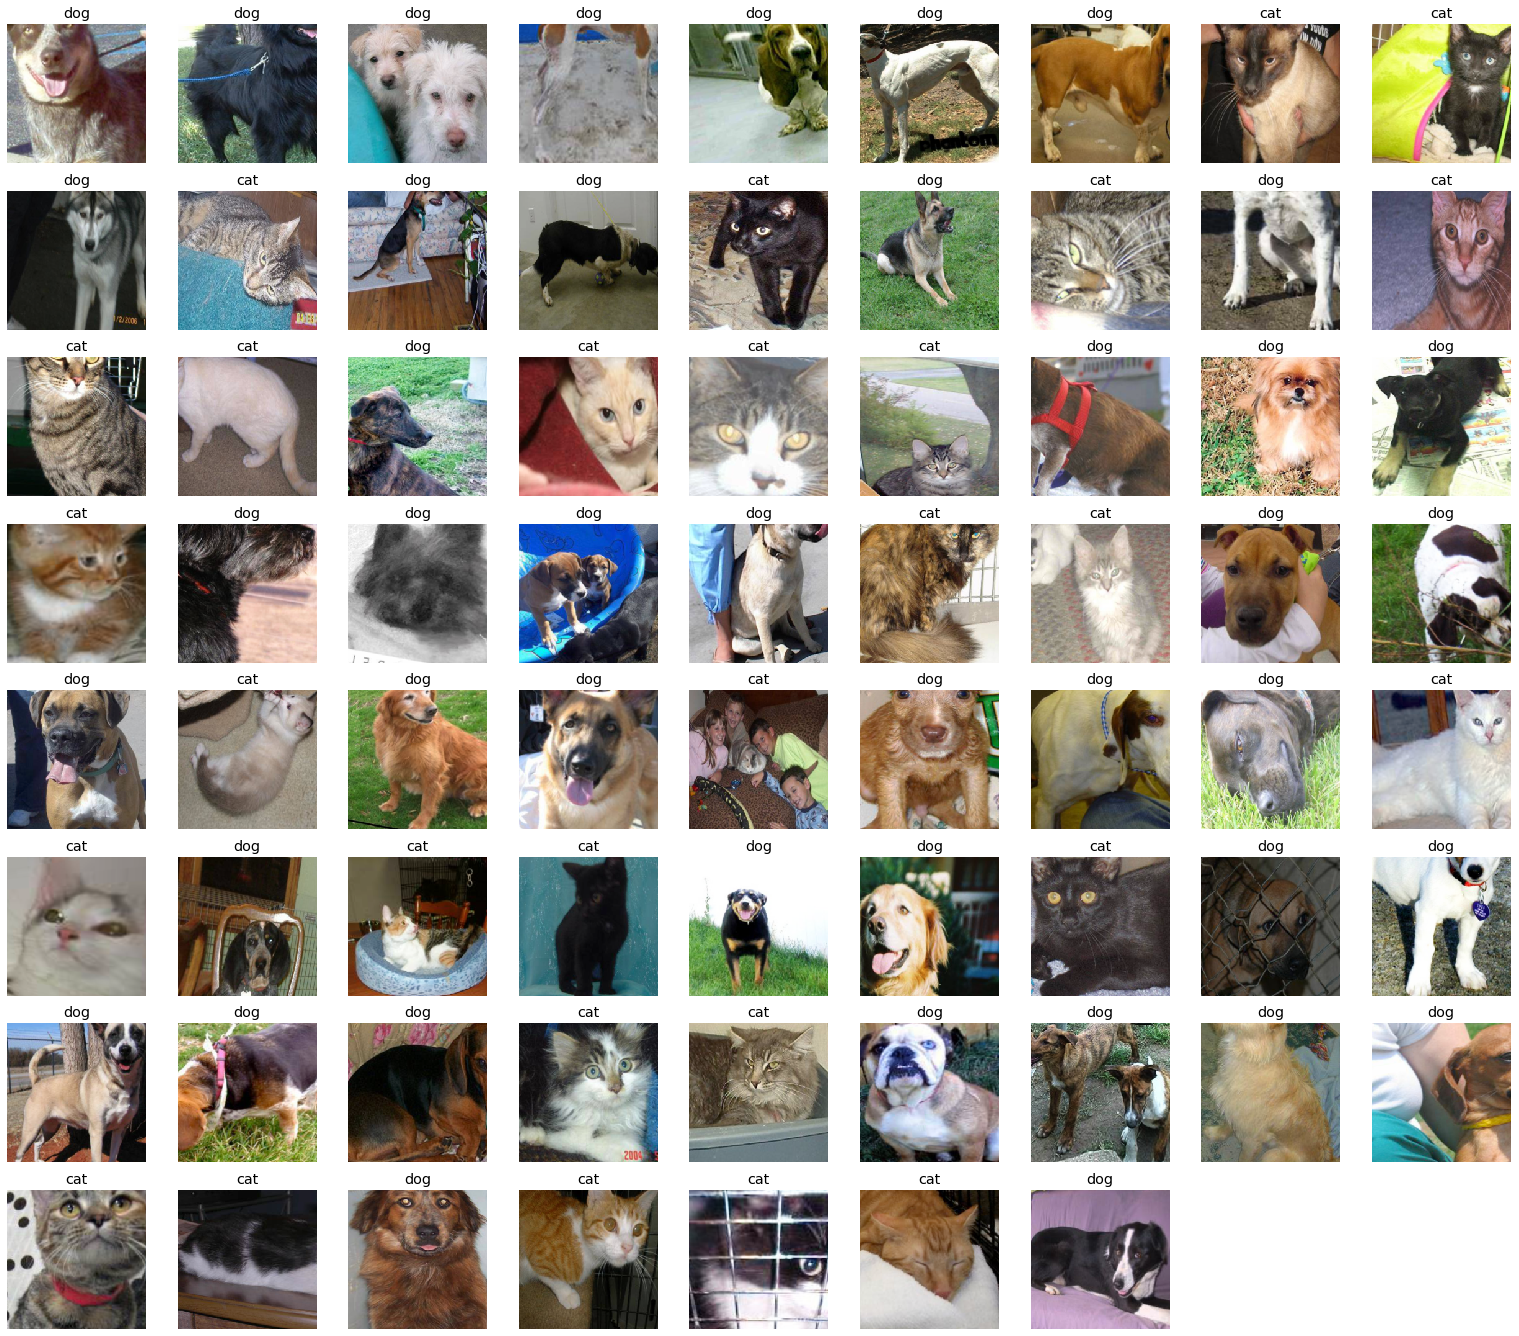

In [42]:
dls_70.train.show_batch(max_n=80, nrows=8)

In [57]:
learn = cnn_learner(dls_70, resnet18, metrics=error_rate)
learn.fit(n_epoch=2)

**Batch size of 70**
- When fastai v2 can not create a number of training batches that divides the number of images, fastai v2 do not use all training images (here, fastai v2 uses 70 images at each epoch instead of 80).
- For the validation batch, fastai v2 creates one validation batch of 20 images.
- Conclusion: **it is possible to use a batch size inferior to the number of training images and that does not divide this number.**

### bs = 40

In [55]:
# number of images in training and validation datasets
len(dls_40.train_ds), len(dls_40.valid_ds)

(80, 20)

In [56]:
# number of training and validation batches
len(dls_40.train), len(dls_40.valid)

(2, 1)

In [59]:
# number of images in all training batches
print('***** number of images in all training batches *****')
res = 0
if len(dls_40.train) != 0:
    for b in dls_40.train:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

# number of images in all validation batches
print('***** number of images in all validation batches *****')
res = 0
if len(dls_40.valid) != 0:
    for b in dls_40.valid:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

***** number of images in all training batches *****
80
***** number of images in all validation batches *****
20


In [58]:
learn = cnn_learner(dls_40, resnet18, metrics=error_rate)
learn.fit(n_epoch=2)

### bs = 10

In [64]:
# number of images in training and validation datasets
len(dls_10.train_ds), len(dls_10.valid_ds)

(80, 20)

In [65]:
# number of training and validation batches
len(dls_10.train), len(dls_10.valid)

(8, 2)

In [66]:
# number of images in all training batches
print('***** number of images in all training batches *****')
res = 0
if len(dls_10.train) != 0:
    for b in dls_10.train:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

# number of images in all validation batches
print('***** number of images in all validation batches *****')
res = 0
if len(dls_10.valid) != 0:
    for b in dls_10.valid:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

***** number of images in all training batches *****
80
***** number of images in all validation batches *****
20


In [64]:
learn = cnn_learner(dls_10, resnet18, metrics=error_rate)
learn.fit(n_epoch=2)

### bs = 7

In [67]:
# number of images in training and validation datasets
len(dls_7.train_ds), len(dls_7.valid_ds)

(80, 20)

In [68]:
# number of training and validation batches
len(dls_7.train), len(dls_7.valid)

(11, 3)

In [72]:
# number of images in all training batches
print('***** number of images in all training batches *****')
res = 0
if len(dls_7.train) != 0:
    for b in dls_7.train:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

# number of images in all validation batches
print('***** number of images in all validation batches *****')
res = 0
if len(dls_7.valid) != 0:
    for b in dls_7.valid:
        res += b[0].shape[0]
    print(res)
else:
    print('0')

***** number of images in all training batches *****
77
***** number of images in all validation batches *****
20


In [65]:
learn = cnn_learner(dls_7, resnet18, metrics=error_rate)
learn.fit(n_epoch=2)

**Batch size of 7**
- When fastai v2 can not create a number of training batches that divides the number of images, fastai v2 do not use all training images (here, fastai v2 uses 77 images at each epoch instead of 80).
- For the validation batch, fastai v2 creates one validation batch of 20 images.
- Conclusion: **it is possible to use a batch size inferior to the number of training images and that does not divide this number.**

# END